# COVID19 India Analysis

### The jupyter notebook is intended to analyze the trends in the country over the tenure of 269 days. It fits a polynomial regression model and calculates the R-Square values for different degrees, finally obtaining the optimal model. It also builds correlation among the parameters, thus analyzing the trends.

In [1]:
# pandas is a software library written for the Python programming language for data manipulation and analysis. To import the data into a pandas dataframe (df) and display the first five rows using head()

import os, types
import pandas as pd

In [2]:
# To import the .csv data into a pandas dataframe and display the first five rows
    
df = pd.read_csv(body)
df.head()

,Day,Retail,Grocery/ Pharma,Parks,Transit Spots,Workplaces,Residential,Lockdown,Active Cases
0,1,-80.458861,-31.613924,-55.832278,-63.544304,-29.645570,22.344937,-100,16564
1,2,-79.383436,-26.478528,-47.806748,-62.315951,-45.726994,26.549080,-100,17249
2,3,-78.954955,-25.900901,-47.222222,-60.732733,-46.000000,25.699700,-100,18405
3,4,-78.696429,-24.110119,-47.011905,-59.824405,-44.169643,24.922619,-100,19209
4,5,-78.691176,-24.491176,-46.964706,-60.305882,-43.850000,24.967647,-100,20179


In [3]:
# describe() gives a outline of the dataset by providing the primary analysis 

df.describe()

,Day,Retail,Grocery/ Pharma,Parks,Transit Spots,Workplaces,Residential,Lockdown,Active Cases
count,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000
mean,135.000000,-36.396433,14.754259,-27.794377,-25.391497,-14.919641,12.664699,43.494424,321241.464684
std,77.797815,19.839180,14.745239,14.531587,15.338305,8.832184,3.767260,90.213578,207349.968745
min,1.000000,-80.458861,-31.613924,-55.832278,-63.544304,-46.000000,5.823529,-100.000000,16564.000000
25%,68.000000,-49.750567,5.596330,-37.644144,-33.907449,-17.649746,10.667421,-100.000000,155118.000000
50%,135.000000,-36.814732,18.972789,-31.309417,-28.258503,-13.990909,12.359375,100.000000,312670.000000
75%,202.000000,-17.334842,25.697517,-22.031746,-12.782313,-9.779221,13.941176,100.000000,458132.000000
max,269.000000,0.552036,54.128959,9.216704,2.321267,3.706818,26.549080,100.000000,762541.000000


In [4]:
# Scikit-learn (formerly scikits.learn and also known as sklearn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

In [5]:
# To divide the dataframe into X (independent parameters) and Y (dependent variable)

X = df[['Day','Retail','Grocery/ Pharma','Parks','Transit Spots','Workplaces','Residential','Lockdown']]
Y = df[['Active Cases']]

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# To divide the dataset into training and testing dataset for enhanced performance on unknown data

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state = 0)

In [8]:
# To perform polynomial regression model on th training dataset and test the model on testing dataset to acquire the R-Square values (for degress 1-10)

Rsqu_test = []
order = [1,2,3,4,5,6,7,8,9,10]
for n in order:
    pr = PolynomialFeatures(degree = n)
    x_train_pr = pr.fit_transform(x_train)
    x_test_pr = pr.fit_transform(x_test)
    lm.fit(x_train_pr,y_train)
    Rsqu_test.append(lm.score(x_test_pr,y_test))

In [9]:
Rsqu_test

[0.7944078411592574,
 0.9387280284911631,
 0.7136552621851047,
 -1.73178676097953,
 -0.8298959485811157,
 -3.1166831057268523,
 -6.522839699995473,
 -12.631432941436103,
 -24.586469679210026,
 -51.920133125050114]

In [10]:
# Maximum Value of R-Square value to select the optimum model

i = Rsqu_test.index(max(Rsqu_test))
Rsqu_test[i]

0.9387280284911631

In [11]:
# To get the model with highest R-Square Value

pr = PolynomialFeatures(degree = i+1)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
lm.fit(x_train_pr,y_train)

LinearRegression()

In [12]:
# To get the coefficients and intercept value of the model

print("Coefficients: \n", lm.coef_, "\n\n","Intercept:", lm.intercept_)

Coefficients: 
 [[-1.11798364e-07 -4.94347012e+04  1.99025112e+05 -1.00830928e+05
  -7.57518668e+03  6.43188869e+04  4.87807190e+04  9.78053409e+04
   8.68516399e+02  4.58245963e+01 -7.86466197e+02  3.72544947e+02
  -3.24574723e+01 -1.52780799e+02 -1.98503050e+02 -5.26617035e+02
   4.22897183e+01  9.87127867e+02 -1.05988099e+03 -2.48677124e+02
   1.15795767e+03  9.18324482e+02  1.77793853e+03  9.56482130e+01
   2.82060423e+02  1.09705404e+02 -4.41637692e+02 -8.38579028e+01
  -1.34643872e+02 -6.10247687e+00 -3.47387412e+01  4.08557679e+02
   3.98722956e+02  1.19748533e+03  6.65472553e+01 -2.61277736e+02
  -5.65658327e+02 -3.74594871e+02 -9.11141526e+01  1.77217839e+02
   1.13002656e+03  4.92741455e+01  3.03401819e+03  5.44491440e+01
   0.00000000e+00]] 

 Intercept: [8341002.99426599]


In [13]:
# Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

import seaborn as sns

In [14]:
# Select a dataframe of all parameters (dependent and independent)

D = df[['Retail','Grocery/ Pharma','Parks','Transit Spots','Workplaces','Residential','Active Cases']]

In [15]:
# To find pearson correlation among the parameters

corr = D.corr()

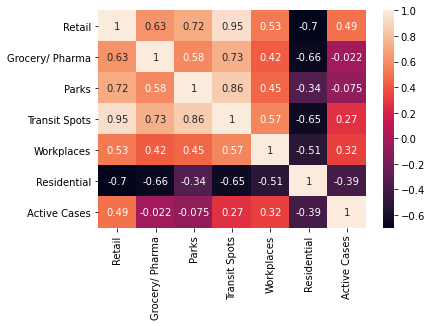

In [16]:
# To visualize the correlation in form of a heatmap

sns.heatmap(corr,annot = True)